##подключение пакетов 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
#import tensorflow.keras as kr
import pandas as pd
import seaborn as sns
#from google.colab import drive

%matplotlib inline

In [ ]:
# from google.colab import output
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/5/Beep-09.ogg").play()')
#from google.colab import output
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
#pip install keras_tuner

In [ ]:
#import keras_tuner as kt

In [ ]:
import zipfile
from tqdm.notebook import tqdm_notebook

##извлечение файлов и нормировка


In [ ]:
#f=open(r"/content/drive/MyDrive/Colab Notebooks/data from collab.zip",'r')
#file=zipfile.ZipFile(f)
with zipfile.ZipFile("data from collab.zip") as zip_data:
  zip_data.printdir()
  zip_data.extractall()
  #output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

File Name                                             Modified             Size
fe.dat                                         2021-09-10 23:20:44      2437897
he.dat                                         2021-09-10 23:20:42      2527546
n.dat                                          2021-09-10 23:20:40      2527481
p.dat                                          2021-09-10 23:20:30      2437425
p.paramnames                                   2021-09-10 23:21:46          134
task5_gamma.dat                                2021-09-10 23:21:38      3844863
task5_p.dat                                    2021-09-10 23:21:34      3842405
task5_p.paramnames                             2021-09-10 23:21:44          134
task5_unknown.dat                              2021-09-10 23:21:24       640383
unknown1.dat                                   2021-09-10 23:21:12       609402
unknown2.dat                                   2021-09-10 23:21:14       625251
unknown3.dat                            

In [ ]:
paramnames=open("p.paramnames")
name=paramnames.readlines()
print(name)
file_fe=pd.read_csv("fe.dat",sep=' ',names=name)
file_he=pd.read_csv("he.dat",sep=' ',names=name)
file_n=pd.read_csv("n.dat",sep=' ',names=name)
file_p=pd.read_csv("p.dat",sep=' ',names=name)
file_n[:3]

['theta\n', 'S800\n', 'ndet\n', 'ndet_excluded\n', 'chi2\n', 'a_Linsley\n', 'AoP\n', 'AoP_slope\n', 'S3\n', 'S4.5\n', 'total_signal\n', 'asymm\n', 'npeaks\n', 'npeaks_highest\n', 'asymmpeaks_u\n', 'asymmpeaks_l\n']


,theta\n,S800\n,ndet\n,ndet_excluded\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n,asymm\n,npeaks\n,npeaks_highest\n,asymmpeaks_u\n,asymmpeaks_l\n
0,30.24,31.9005,12,0,0.78576,0.473569,400.123,-349.005,1.964063,3.017109,165.525,0.297806,66,11,15,10
1,30.96,43.6306,10,0,1.14002,0.646790,396.505,-284.943,1.828066,2.493158,388.350,0.126819,76,11,11,7
2,23.65,39.2666,9,0,1.03139,0.561117,466.047,-549.563,1.757809,1.493493,1044.720,0.101842,72,6,12,8


In [ ]:
all_file=pd.concat([file_fe,file_he,file_p,file_n])#,keys=['fe','he','p','n'])
all_file=all_file.sample(frac=1)

In [ ]:
mean=all_file.mean()
#print(mean)
std=all_file.std()
#print(std)
new_all_file=all_file-mean
new=new_all_file.div(std,axis="columns")
all_file=new

In [ ]:
max_=all_file.abs()
max_abs=max_.max()
#print(std)
new=all_file.div(max_abs,axis="columns")
all_file=new


In [ ]:
all_file.abs().max()


theta\n             1.0
S800\n              1.0
ndet\n              1.0
ndet_excluded\n     1.0
chi2\n              1.0
a_Linsley\n         1.0
AoP\n               1.0
AoP_slope\n         1.0
S3\n                1.0
S4.5\n              1.0
total_signal\n      1.0
asymm\n             1.0
npeaks\n            1.0
npeaks_highest\n    1.0
asymmpeaks_u\n      1.0
asymmpeaks_l\n      1.0
dtype: float64

In [ ]:
# def range_abs_1(file):
#   max_=file.abs()
#   max_abs=max_.max()
#   print(max_abs)
#   new=file.div(max_abs,axis="columns")
#   return ()
# range_abs_1(all_file)
# all_file.abs().max()

In [ ]:
corr_name=name[:2]+name[4:11]
new=all_file[corr_name]
all_file=new

In [ ]:
num=len(all_file)
print(num)
frac_train=0.8    #80%
num_train=int(num*0.9)
print(num_train,"number train")
num_test=num-num_train
train_data=all_file[:num_train]
test_data=all_file[num_train:]
train_data=train_data.to_numpy()

test_data=test_data.to_numpy()
train_data[0]
all_file.shape

80000
72000 number train


(80000, 9)

In [ ]:
# mean=all_file.mean()
# print(type (all_file))
# print(mean.shape)
# std=all_file.std()
# print(std.shape)
# new_all_file=all_file-mean
# new=new_all_file.div(std,axis="columns")
# all_file=new

нормировка (0,1)

In [ ]:
# corr_name=name[:2]+name[4:11]
# new=all_file[corr_name]
# all_file=new

## Корреляция


,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
theta\n,1.000000,-0.415539,0.061855,-0.129277,-0.366602,0.262355,0.483501,0.313795,-0.011006
S800\n,-0.415539,1.000000,-0.152151,-0.152874,0.613344,-0.220324,-0.311954,-0.162651,0.237589
chi2\n,0.061855,-0.152151,1.000000,-0.299145,-0.146826,0.366479,0.398954,0.461997,-0.039472
a_Linsley\n,-0.129277,-0.152874,-0.299145,1.000000,-0.083918,-0.376202,-0.375936,-0.421265,-0.091692
AoP\n,-0.366602,0.613344,-0.146826,-0.083918,1.000000,-0.628981,-0.312511,-0.228431,0.079558
AoP_slope\n,0.262355,-0.220324,0.366479,-0.376202,-0.628981,1.000000,0.495785,0.516001,0.030793
S3\n,0.483501,-0.311954,0.398954,-0.375936,-0.312511,0.495785,1.000000,0.886296,0.231495
S4.5\n,0.313795,-0.162651,0.461997,-0.421265,-0.228431,0.516001,0.886296,1.000000,0.016295
total_signal\n,-0.011006,0.237589,-0.039472,-0.091692,0.079558,0.030793,0.231495,0.016295,1.000000


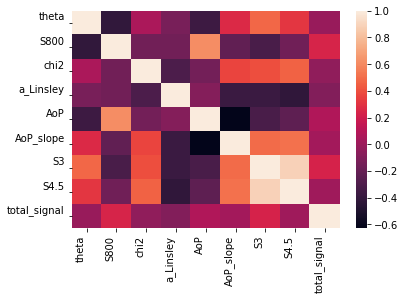

In [ ]:
def correlation(df, show=False):
  corr_matrix=df.corr()
  if show:
    sns.heatmap(corr_matrix)
  return (corr_matrix)
correlation(all_file,show=True)

отрисовка произвольных 20000 значений друг от друга. по диагонале отрисовка гистограм

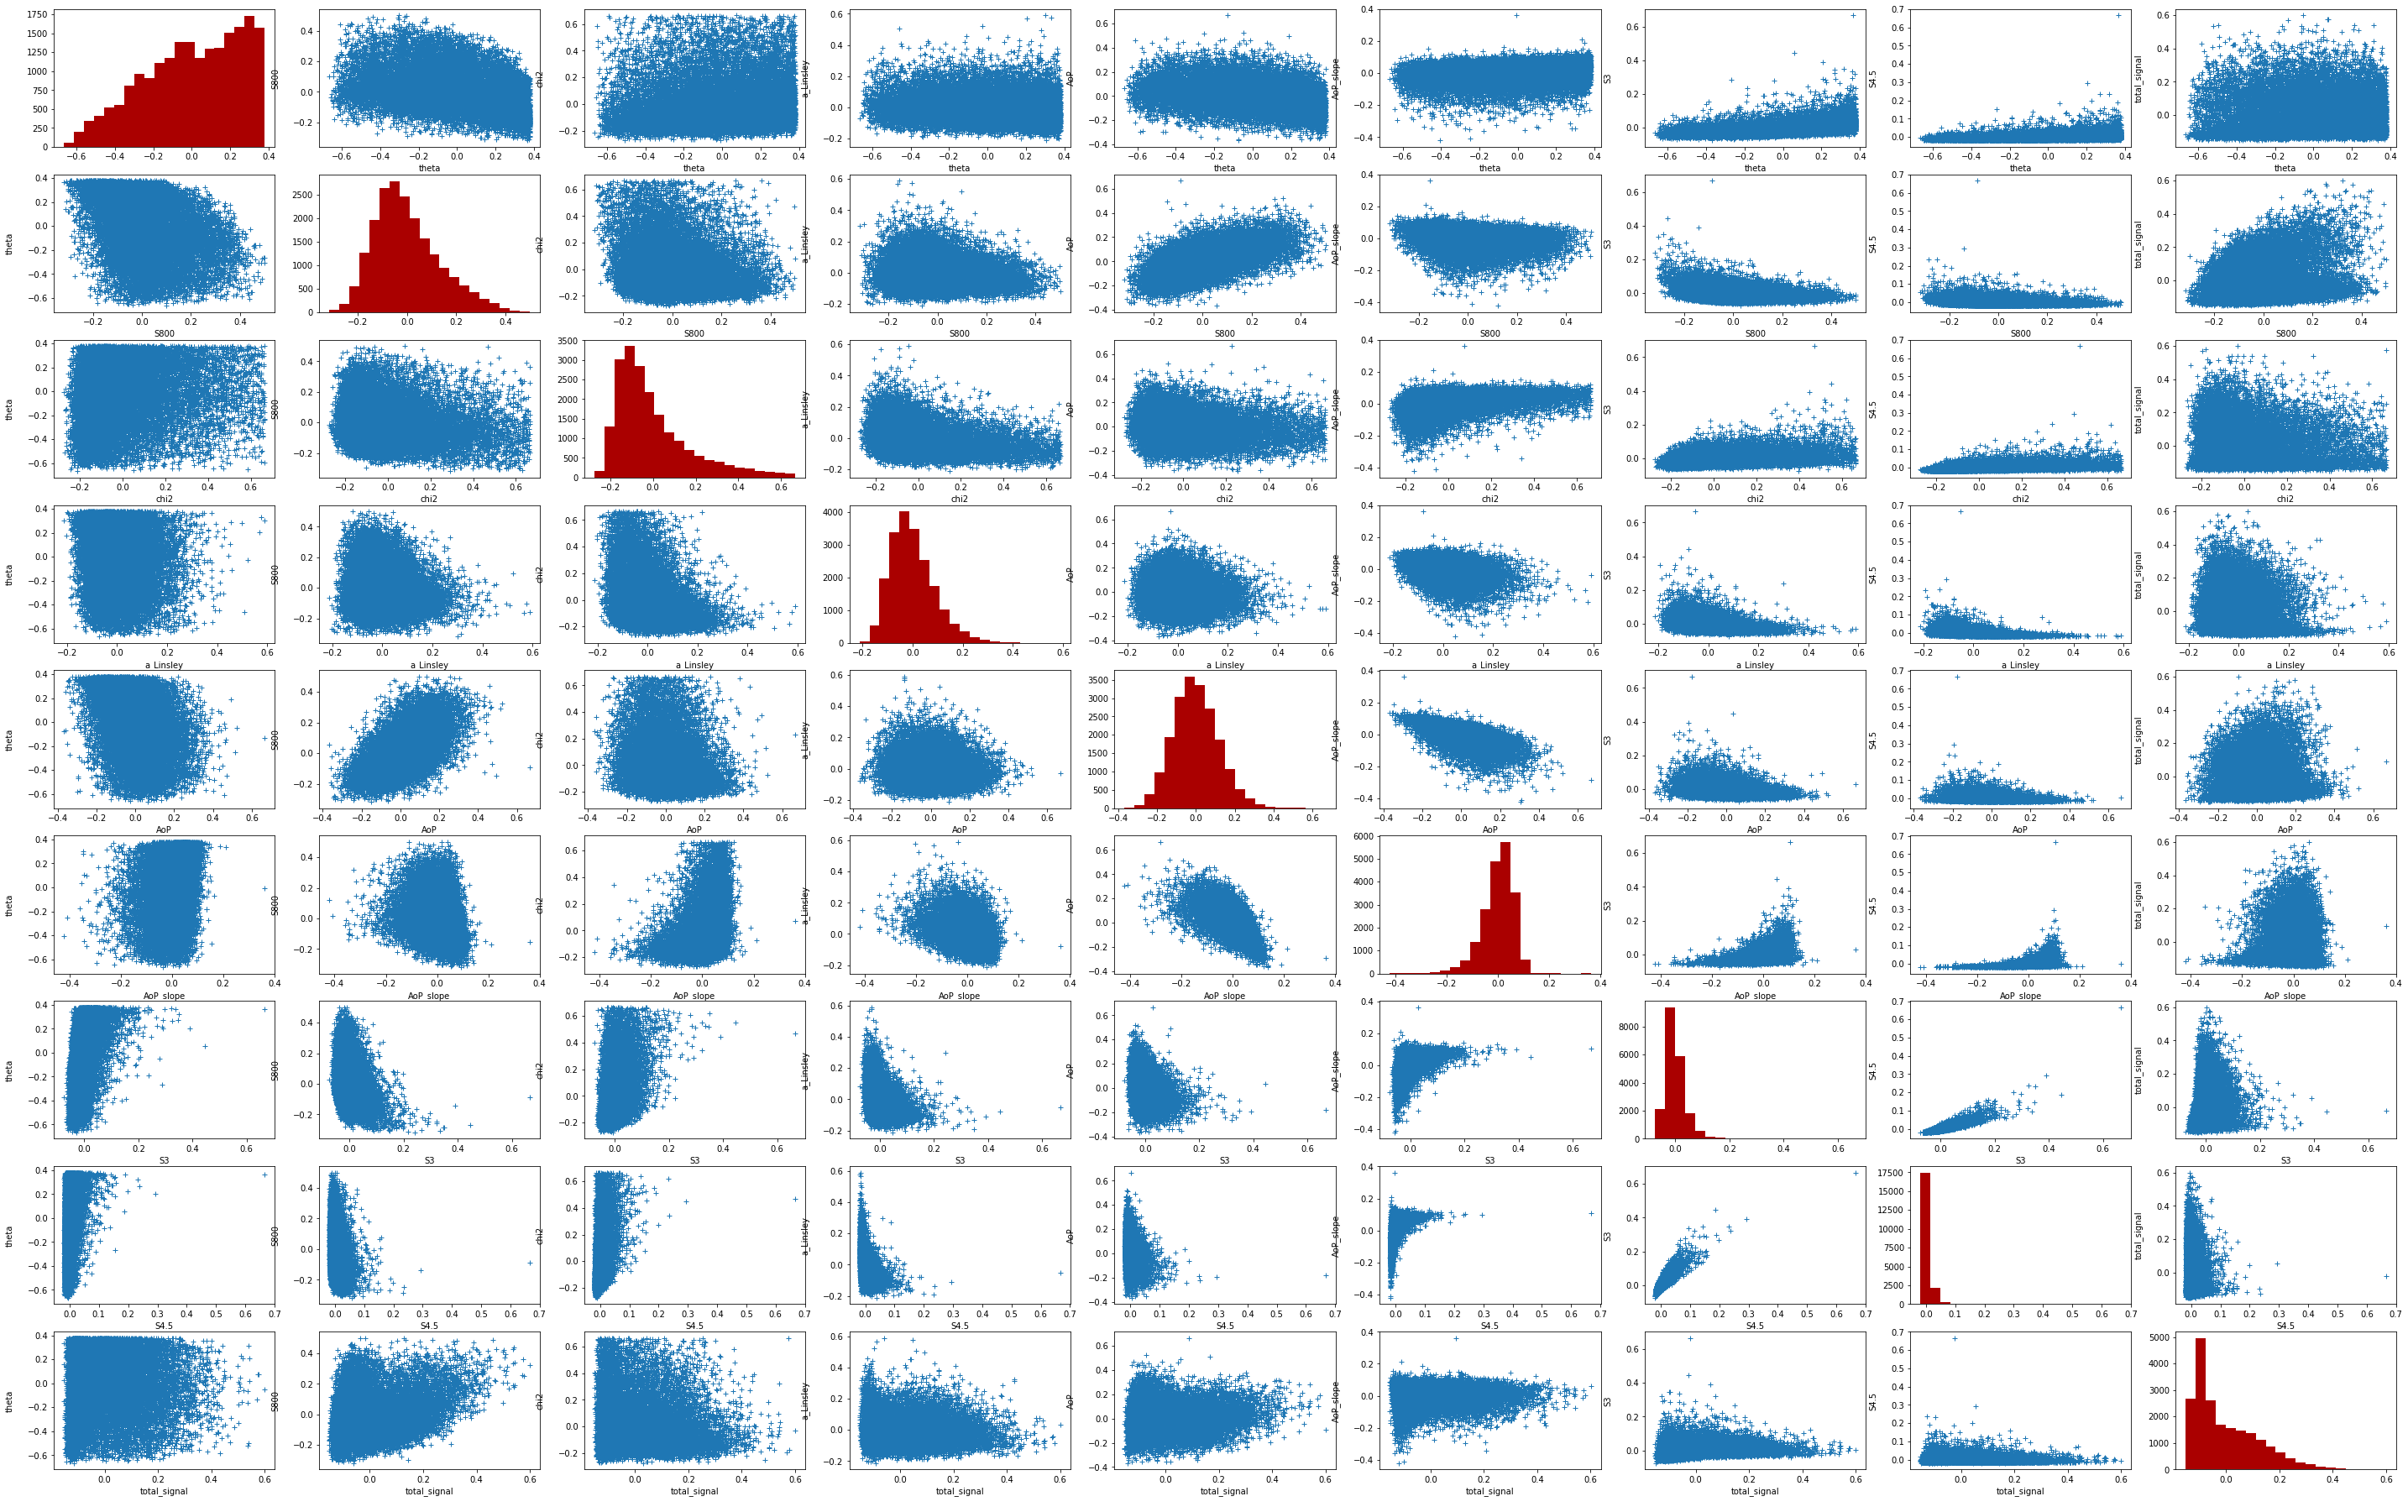

In [ ]:
corr_parametrs=name[0:6]+name[8:10]
#print(corr_parametrs)
#print(axs)
#axs[1][0].plot(np.array([0,1,2,3]),np.array([0,2,4,6]))
def corr_plot(data,param):
  n=len(param)
  fig,axs=plt.subplots(n,n,figsize=(50,32))
  for i in range(n):
    x_name=param[i]
    x=data[x_name][:20000]
    #print(len(x))
    for j in range(n):
      y_name=param[j]
      y=data[y_name][:20000]
      #print(len(y))
      if i!=j:
        axs[i][j].plot(x,y,'+')
        axs[i][j].set_xlabel(x_name)
        axs[i][j].set_ylabel(y_name)
      else:
        axs[i][i].hist(x,bins=20,color='#AA0000')
corr_plot(all_file[:20000],corr_name)


# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
noise_dim=500
l=len(corr_name)
l

9

## создание гениратора и дискриминатора 

In [ ]:
def abs_1(x):# делает тензор в диапазонй -1:1
  a=tf.reduce_max(tf.abs(x))
  x=x/a
  return (x)


In [ ]:
def Generator_model(): 
  # model = tf.keras.Sequential()
  # model.add(tf.keras.layers.Dense(units=100,activation=tf.keras.activations.tanh,input_shape=(noise_dim,)))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh))
  # model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh))

  input_tensor=tf.keras.Input(shape=(noise_dim,))
  #x=tf.keras.layers.Dense(units=100,use_bias=False,activation=tf.keras.activations.tanh)(input_tensor)
  #x=tf.keras.layers.BatchNormalization()(x)
  #x=abs_1(x)
  x=tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh)(input_tensor)
  x=tf.keras.layers.BatchNormalization()(x)
  #x=abs_1(x)
  x=tf.keras.layers.Dense(units=40,use_bias=False,activation=tf.keras.activations.tanh)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  #x=abs_1(x)
  x=tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh)(x)

  model= tf.keras.Model(input_tensor,x)
  return model

In [ ]:
# def Generator_model(): 
#   input_tensor=tf.keras.Input(shape=(noise_dim,))
#   x=tf.keras.layers.Dense(units=50,use_bias=False)(input_tensor)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=40,use_bias=False)(x)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=30,use_bias=False)(x)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=20,use_bias=False)(x)
#   x=tf.keras.layers.LeakyReLU()(x)
#   x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   #x=tf.keras.layers.Dense(units=20,use_bias=False,activation=tf.keras.activations.tanh)(x)
#   #x=tf.keras.layers.BatchNormalization()(x)
#   #x=abs_1(x)
#   x=tf.keras.layers.Dense(units=l,use_bias=False,activation=tf.keras.activations.tanh)(x)

#   model= tf.keras.Model(input_tensor,x)
#   return model

In [ ]:
def Discriminator_model():
  # model=tf.keras.Sequential()
  # #model.add(tf.keras.layers.Dense(units=16,activation=tf.keras.activations.relu))
  # model.add(tf.keras.layers.Dense(units=l*l,activation=tf.keras.activations.relu,input_shape=(l,)))
  # model.add(tf.keras.layers.Dense(units=32,activation=tf.keras.activations.relu))
  # #model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=20,activation=tf.keras.activations.relu))
  # model.add(tf.keras.layers.Dense(units=20,activation=tf.keras.activations.relu))
  # #model.add(tf.keras.layers.BatchNormalization())
  # model.add(tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid))
  input_tensor=tf.keras.Input(shape=(l,))
  #shape_input=input_tensor.shape()
  # прибавление шума 
  #input_tensor+=noise
  #
  x=tf.keras.layers.Dense(units=l*l)(input_tensor)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)
  x=tf.keras.layers.Dense(units=32)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Dense(units=20)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)

  x=tf.keras.layers.Dense(units=20)(x)
  x=tf.keras.layers.BatchNormalization()(x)
  x=tf.keras.layers.ReLU()(x)
  
  x=tf.keras.layers.Dense(units=1,activation=tf.keras.activations.sigmoid)(x)
  model= tf.keras.Model(input_tensor,x)
  return model

In [ ]:


generator = Generator_model()
discriminator=Discriminator_model()
batch=32

noise = tf.random.normal(shape=(batch,noise_dim))

# print(noise)
f_data = generator(noise, training=False)


r_data = discriminator(generated_data)
#print (decision)

In [ ]:
discriminator=Discriminator_model()

In [ ]:
discriminator.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 9)]               0         
                                                                 
 dense_9 (Dense)             (None, 81)                810       
                                                                 
 batch_normalization_7 (Batc  (None, 81)               324       
 hNormalization)                                                 
                                                                 
 re_lu_4 (ReLU)              (None, 81)                0         
                                                                 
 dense_10 (Dense)            (None, 32)                2624      
                                                                 
 batch_normalization_8 (Batc  (None, 32)               128       
 hNormalization)                                           

In [ ]:
generator.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 40)                20000     
                                                                 
 batch_normalization (BatchN  (None, 40)               160       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 40)                1600      
                                                                 
 batch_normalization_1 (Batc  (None, 40)               160       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 20)                800   

##loss and generat_new_data


In [ ]:
def gradient_penalty(batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        This loss is calculated on an interpolated image
        and added to the discriminator loss.
        """
        # Get the interpolated image
        alpha = tf.random.normal([batch_size, 1], 0.0, 1.0)
        diff = fake_images - real_images
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 1. Get the discriminator output for this interpolated image.
            pred = discriminator(interpolated, training=True)

        # 2. Calculate the gradients w.r.t to this interpolated image.
        grads = gp_tape.gradient(pred, [interpolated])[0]# because list

        # 3. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        gp = tf.reduce_mean((norm - 1.0) ** 2)
        return gp

In [ ]:
def gradient_penalti(batch,real_data,fake_data):
  
  epsilon=tf.random.uniform(shape=(batch,1))
  # print(epsilon.shape,'epsilon.shape')
  interpolated=fake_data+epsilon*(real_data-fake_data)# вычисление x^ как в статье
  # print(interpolated.shape,"interpolated-shape")
  # print(fake_data.shape,'fake_data.shape')
  # print(real_data.shape,"real_data.shape")
  with tf.GradientTape() as gp_tape:
    gp_tape.watch(interpolated)
    pred=discriminator(interpolated,training=True)  # D(x^)
  # with tf.GradientTape() as gp_tape:
    # gp_tape.watch(interpolated)
  
  grads = gp_tape.gradient(pred, [interpolated])[0]# because list
  # print(grads.shape,"GRADS.shape")
  norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[0, 1]))
  gp = tf.reduce_mean((norm - 1.0) ** 2)
  return gp



In [ ]:
def discriminator_loss(real_data, fake_data):
    real_loss = tf.reduce_mean(real_data)
    fake_loss = tf.reduce_mean(fake_data)
    return fake_loss - real_loss


# Define the loss functions for the generator.
def generator_loss(fake_data):
    return -tf.reduce_mean(fake_data)

generator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)
discriminator_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5, beta_2=0.9)

In [ ]:
def train_step_WGAN(labda,batch,real_data,weight):
  # labda --> number learling critic
  #weight --> weight gradient_penalti

  #learning critic
  for i in range(labda):
    with tf.GradientTape() as gr:
      noise = tf.random.normal(shape=(batch,noise_dim))
      fake_data=generator(noise)
      real_data=real_data
      fake_predict=discriminator(fake_data)
      real_predict=discriminator(real_data)
      
      gp=gradient_penalti(batch,real_data,fake_data)
      disc_loss=discriminator_loss(real_predict,fake_predict)+weight*gp # critic loss include GP
    d_grad=gr.gradient(disc_loss, discriminator.trainable_variables)
    discriminator_optimizer.apply_gradients(zip(d_grad, discriminator.trainable_variables))


  #learning generator
  noise = tf.random.normal(shape=(batch,noise_dim))
  with tf.GradientTape() as gr:
    fake_data=generator(noise)
    fake_predict=discriminator(fake_data)
    gen_loss=generator_loss(fake_predict)

  g_grad=gr.gradient(gen_loss,generator.trainable_variables)
  generator_optimizer.apply_gradients(zip(g_grad, generator.trainable_variables))

  return((disc_loss,gen_loss))




In [ ]:
batch=32
disc_loss_list=[] 
gen_loss_list=[]
epochs=2
#corr_file= open("corr_file.csv',mode='w') 
def train_WGAN(epochs,train_data,batch):
  #with pd.ExcelWriter('output_batch.xlsx',mode='wa') as writer:
    for i in tqdm_notebook(range(epochs),desc="all progrss"):
      k=0
      lim=len(train_data)//batch
      bar=lim//8
      for num in tqdm_notebook(range (0,len(train_data),batch),desc="in epoch number:"+str(i+1)):
        k+=1
        step_data=train_data[num:num+batch]
        reshape_step_data=np.reshape(step_data,(batch,l))
        (disc_loss,gen_loss)=train_step_WGAN(labda=5,batch=batch,real_data=reshape_step_data,weight=10)
        disc_loss_list.append(disc_loss)
        gen_loss_list.append(gen_loss)
        # if (k%bar)==0:
        #   sheet_name='epoch number'+(str (i+1))+'list number'+(str (k//bar))
        #   corr_dataset=generat_new_data(1000,batch=batch)
        #   matrix=correlation(corr_dataset)
        #   #print(matrix)
        #   matrix.to_excel(writer,sheet_name=sheet_name)
          

train_WGAN(epochs,train_data,batch)

all progrss:   0%|          | 0/2 [00:00<?, ?it/s]

in epoch number:1:   0%|          | 0/2250 [00:00<?, ?it/s]

In [ ]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def discriminator_loss(real_output, fake_output):
    # real_loss = cross_entropy(tf.ones_like(real_output), real_output)/batch
    # fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)/batch
    real_loss=sum(tf.keras.losses.mean_squared_error(tf.ones_like(real_output), real_output))/batch
    fake_loss=sum(tf.keras.losses.mean_squared_error(tf.zeros_like(fake_output), fake_output))/batch
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
  #return cross_entropy(tf.ones_like(fake_output), fake_output)
  return sum(tf.keras.losses.mean_squared_error(tf.ones_like(fake_output), fake_output))/batch
generator_optimizer = tf.keras.optimizers.RMSprop(1e-5)
discriminator_optimizer = tf.keras.optimizers.RMSprop(1e-5)

In [ ]:
def generat_new_data(num,batch=1,name=corr_name):
  #num - size dataset
  noise=tf.random.normal(shape=(batch,noise_dim))
  data=generator(noise)
  data=data.numpy()
  df=pd.DataFrame(data,columns=name)
  for i in range(1,num):
    noise=tf.random.normal(shape=(batch,noise_dim))
    data=generator(noise)
    data=data.numpy()
    d=pd.DataFrame(data,columns=name)
    #print(d)
    df=df.append(d)
  return (df)

print(generat_new_data(5))


    theta\n    S800\n    chi2\n  ...      S3\n    S4.5\n  total_signal\n
0  0.216006 -0.793663  0.052856  ...  0.425703  0.831712        0.609420
0 -0.673620  0.575756 -0.182463  ...  0.372959 -0.296324        0.667144
0 -0.800382  0.441266  0.337459  ... -0.019050 -0.234777        0.719841
0 -0.925309 -0.582686  0.043669  ... -0.748330  0.337779        0.724365
0  0.029732  0.307604  0.042385  ... -0.119739 -0.110861        0.162052

[5 rows x 9 columns]


## train

## попытки Batch

In [ ]:

# def train_step(data,show_disc_loss=False):
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    

#     noise=tf.random.normal([1, noise_dim])# 
#     fake_data=generator(noise)

#     real_output=discriminator(data,training=True)
#     fake_output=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)
#     #print(gen_loss)
#     #print(generator.trainable_variables,'gfgfgfgfg')
#     #disc_loss=tf.keras.losses.mean_squared_error()
#   #tensorflow
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
#   if show_disc_loss:
#     return disc_loss
#   #discriminator.compile(optimizer=discriminator_optimizer,loss=disc_loss)
#   #generator.compile(optimizer=generator_optimizer,loss=gen_loss)





In [ ]:
# np.zeros((1,3))

In [ ]:
# def train_step_3(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     real_output=np.zeros((batch))
#     fake_output=np.zeros((batch))
#     for i in range(batch):
#       noise=tf.random.normal([1, 1000])# 
#       fake_data=generator(noise)

#       real_output[i]=discriminator(data[i],training=True)
#       fake_output[i]=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)

#   gen_loss=sum(batch_gen_loss)/batch
#   disc_loss=sum(batch_disc_loss)/batch
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [ ]:
# epochs=1
# disc_loss_list=[]
# #corr_file= open("corr_file.csv',mode='w') 
# def train(epochs,train_data):
#   with pd.ExcelWriter('output.xlsx',mode='wa') as writer:
#     for i in tqdm_notebook(range(epochs),desc="all progrss"):
#       k=0
#       for step_data in tqdm_notebook(train_data,desc="in epoch number:"+str(i)):
#         k+=1
#         #print(step_data.shape)
#         reshape_step_data=np.reshape(step_data,(1,16))
#         #print(reshape_step_data)
#         #print(reshape_step_data.shape)
#         disc_loss=train_step(reshape_step_data,show_disc_loss=True)
#         disc_loss_list.append(disc_loss)
#         # вывод каждые 8000 матрицу корреляции и щапись в файл
#         if (k%8000)==0:
#           sheet_name='sheet'+(str (k//8000))
#           corr_dataset=generat_new_data(1000)
#           matrix=correlation(corr_dataset)
#           print(matrix)
#           matrix.to_excel(writer,sheet_name=sheet_name)
          



# train(epochs,train_data[:500])
# output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

In [ ]:
# print(len(disc_loss_list))
# true_data=all_file[:2]
# print(all_file[:2],'true_data')
# n=np.random.normal(size=(1,500))
# fake=generator(n)
# print(fake,'fake')
# her=np.random.normal(0,size=(1,16))
# print(fake,'fake')
# predict=discriminator(true_data.to_numpy())
# print(predict,'predict')
# fake_predict=discriminator(her)
# print(fake_predict,'fake_predict')
# #disc_loss_list=[]
# #print(disc_loss_list[1000])
# plt.plot(disc_loss_list[:700])

In [ ]:
def train_step_batch(data,batch,show_loss=False):#len(data)=batch
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
      noise=tf.random.normal(shape=(batch,noise_dim))
      fake_data=generator(noise)

      real_output=discriminator(data,training=True)
      fake_output=discriminator(fake_data,training=True)

      disc_loss=discriminator_loss(real_output,fake_output)
      gen_loss=generator_loss(fake_output)
  gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
  gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
  #print(gradients_of_discriminator,'\n\n\n')
  #print(discriminator.trainable_variables,'\n\n\n')

  generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
  if show_loss:
    return ((disc_loss,gen_loss))


внизу прописан batch. не уверен что он работатет правильно, но оно работает. генератор получает шум (batch,noise_dim) дискриминатор получает данные в пакете размером batch.

In [ ]:
discriminator=Discriminator_model()

In [ ]:
batch=32
disc_loss_list=[] 
gen_loss_list=[]
epochs=10
#corr_file= open("corr_file.csv',mode='w') 
def train_2(epochs,train_data,batch):
  #with pd.ExcelWriter('output_batch.xlsx',mode='wa') as writer:
    for i in tqdm_notebook(range(epochs),desc="all progrss"):
      k=0
      lim=len(train_data)//batch
      bar=lim//8
      for num in tqdm_notebook(range (0,len(train_data),batch),desc="in epoch number:"+str(i+1)):
        k+=1
        step_data=train_data[num:num+batch]
        #step_data+=0.1*np.random.normal(size=(step_data.shape))
        #print(step_data.shape)
        reshape_step_data=np.reshape(step_data,(batch,l))
        (disc_loss,gen_loss)=train_step_batch(reshape_step_data,batch,show_loss=True)
        disc_loss_list.append(disc_loss)
        gen_loss_list.append(gen_loss)
        # if (k%bar)==0:
        #   sheet_name='epoch number'+(str (i+1))+'list number'+(str (k//bar))
        #   corr_dataset=generat_new_data(1000,batch=batch)
        #   matrix=correlation(corr_dataset)
        #   #print(matrix)
        #   matrix.to_excel(writer,sheet_name=sheet_name)
          

train_2(epochs,train_data,batch)
#output.eval_js('new Audio("https://upload.wikimedia.org/wikipedia/commons/0/05/Beep-09.ogg").play()')

all progrss:   0%|          | 0/10 [00:00<?, ?it/s]

in epoch number:1:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:2:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:3:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:4:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:5:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:6:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:7:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:8:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:9:   0%|          | 0/2250 [00:00<?, ?it/s]

in epoch number:10:   0%|          | 0/2250 [00:00<?, ?it/s]

,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
0,0.825289,-0.851316,-0.703569,-0.664169,-0.780914,0.810381,-0.882148,-0.985158,-0.552604
0,-0.020164,-0.473650,-0.079949,-0.776025,-0.459560,0.789421,-0.947727,-0.985787,-0.881127
0,0.235986,-0.321790,-0.873021,-0.860287,-0.366652,0.776496,-0.938629,-0.977879,-0.896376
0,0.393583,-0.453091,-0.568217,-0.846952,-0.242292,0.714364,-0.933595,-0.980000,-0.857757


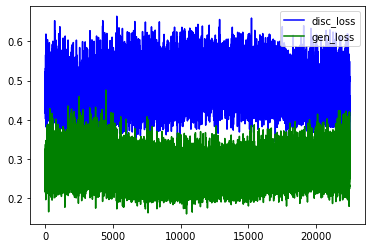

In [ ]:
fig=plt.figure()
plt.plot(disc_loss_list,'b')
plt.plot(gen_loss_list,'g')
plt.legend(['disc_loss','gen_loss'])
plt.savefig(" wisthout noise mse.pdf")
generat_new_data(4)

['theta\n', 'S800\n', 'chi2\n', 'a_Linsley\n', 'AoP\n', 'AoP_slope\n', 'S3\n', 'S4.5\n', 'total_signal\n']


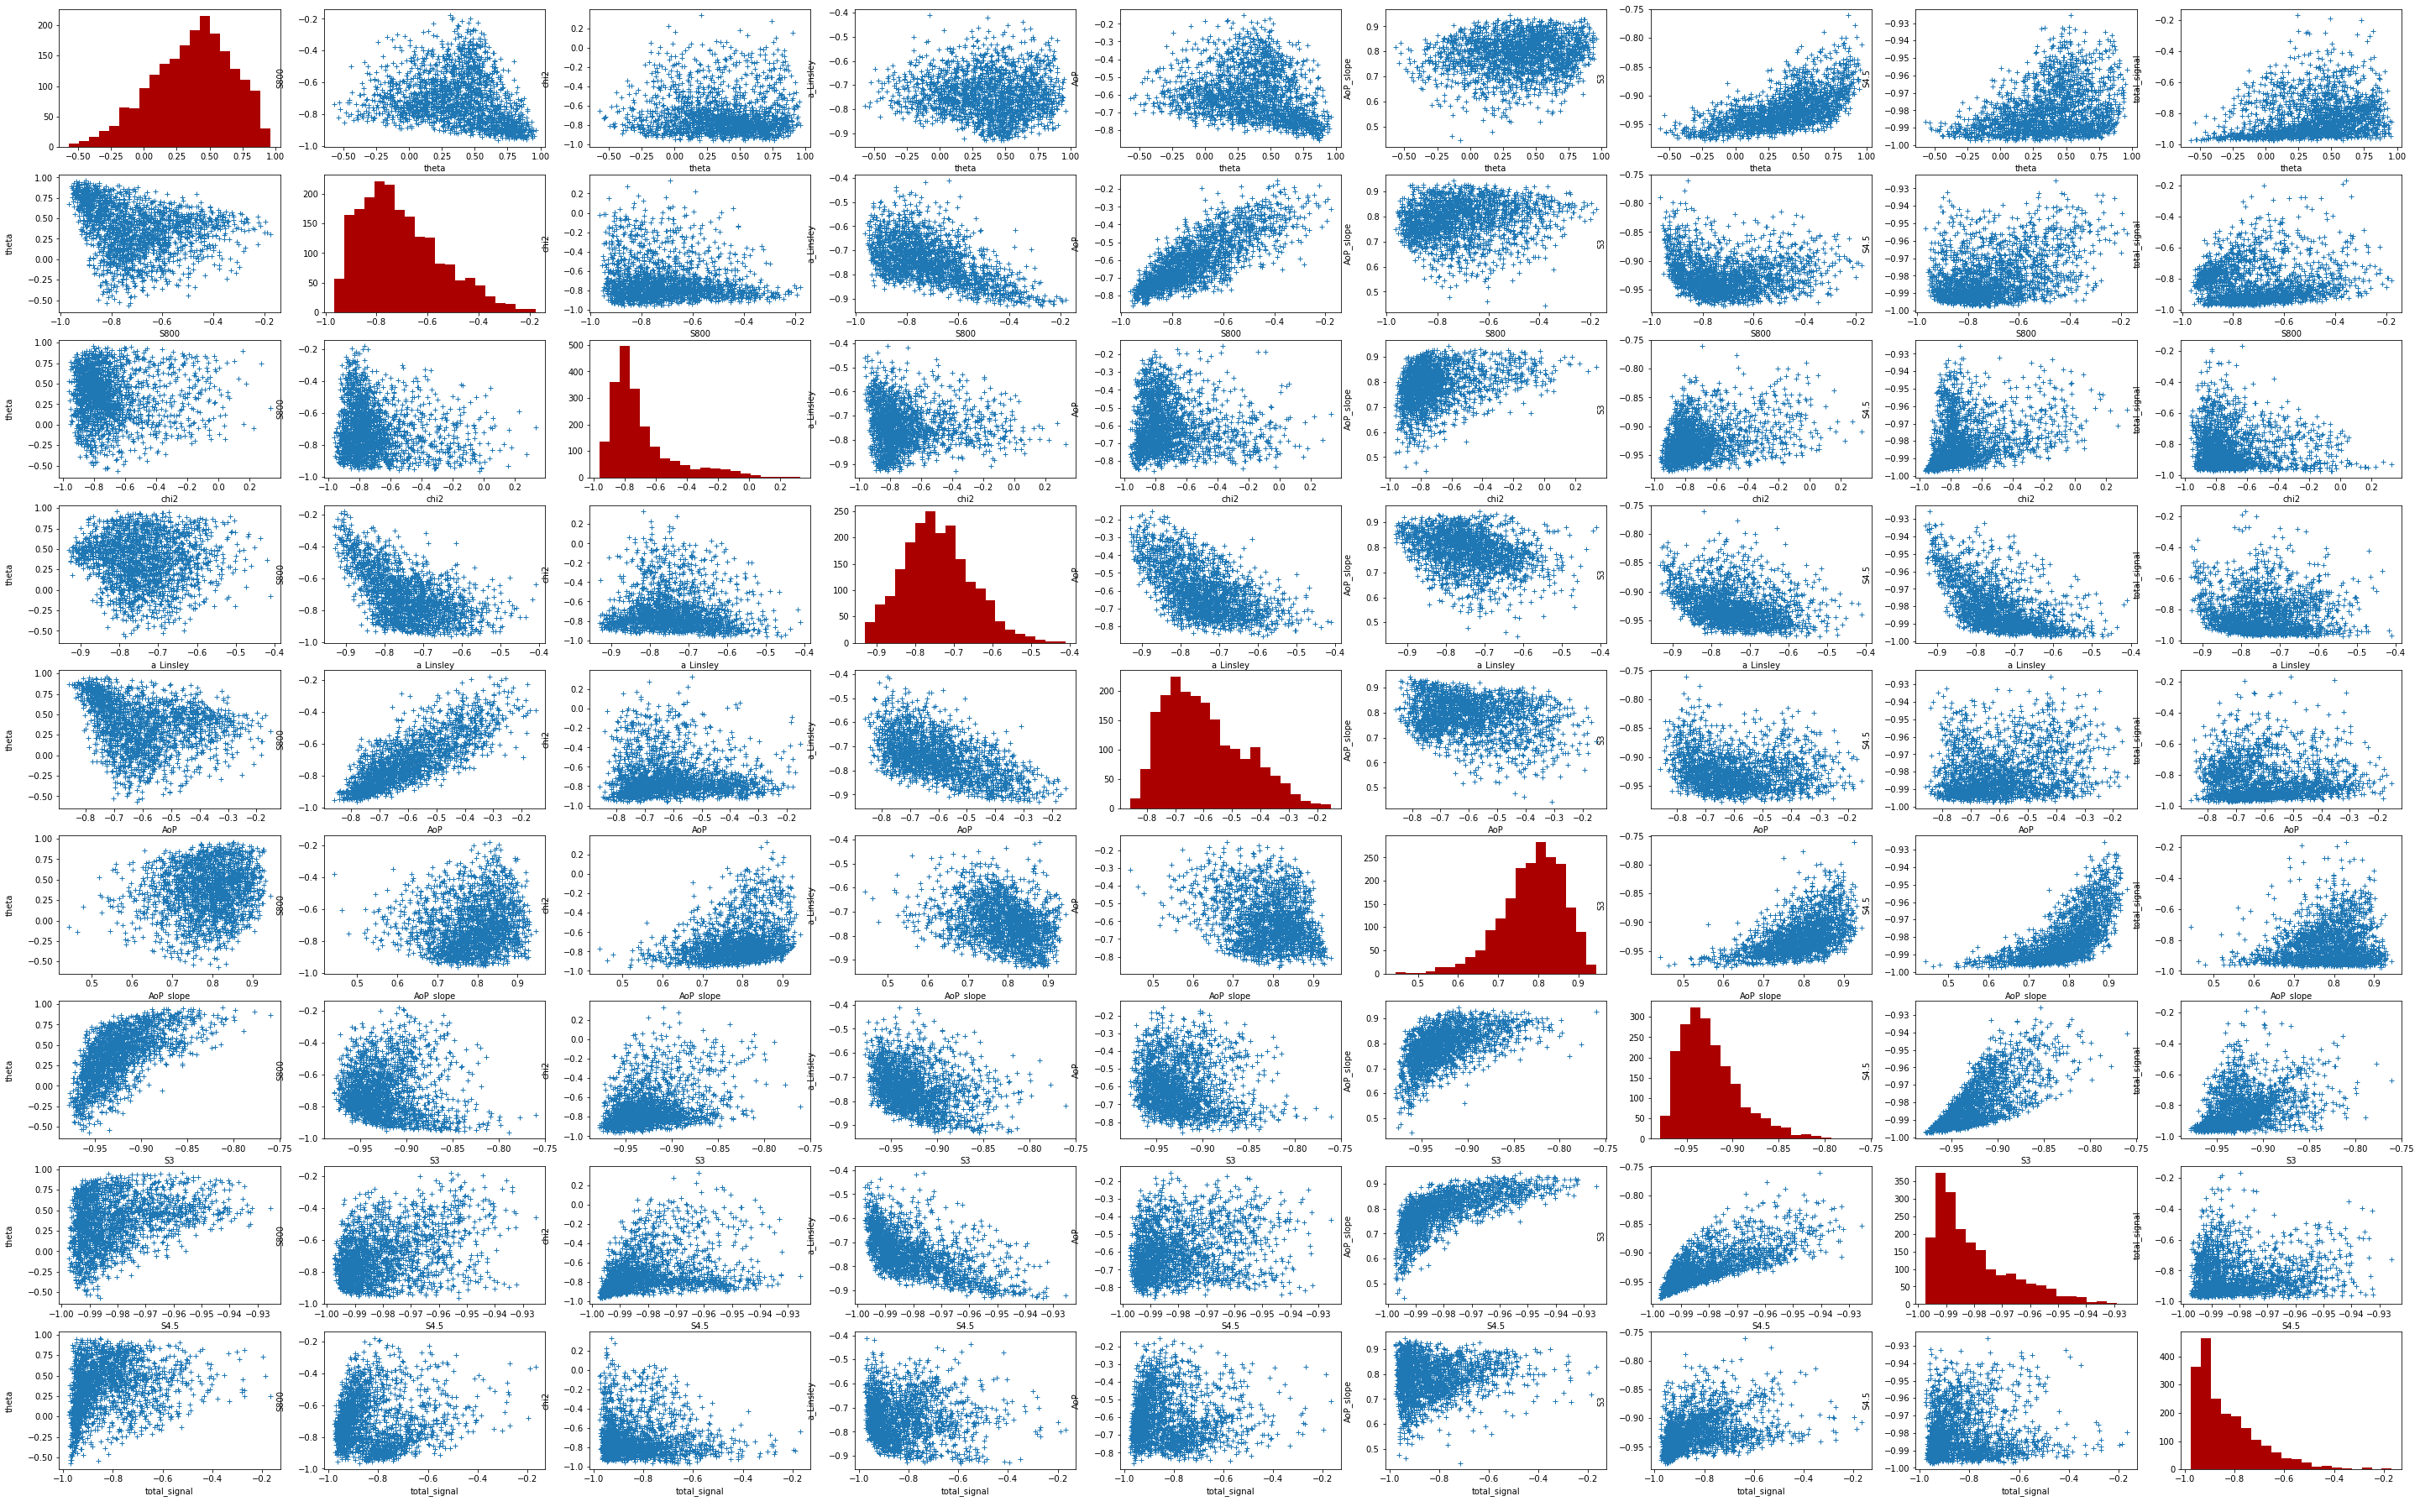

In [ ]:
fake_data=generat_new_data(2000)
corr_name=name[:2]+name[4:11]
print(corr_name)
corr_plot(fake_data,corr_name)

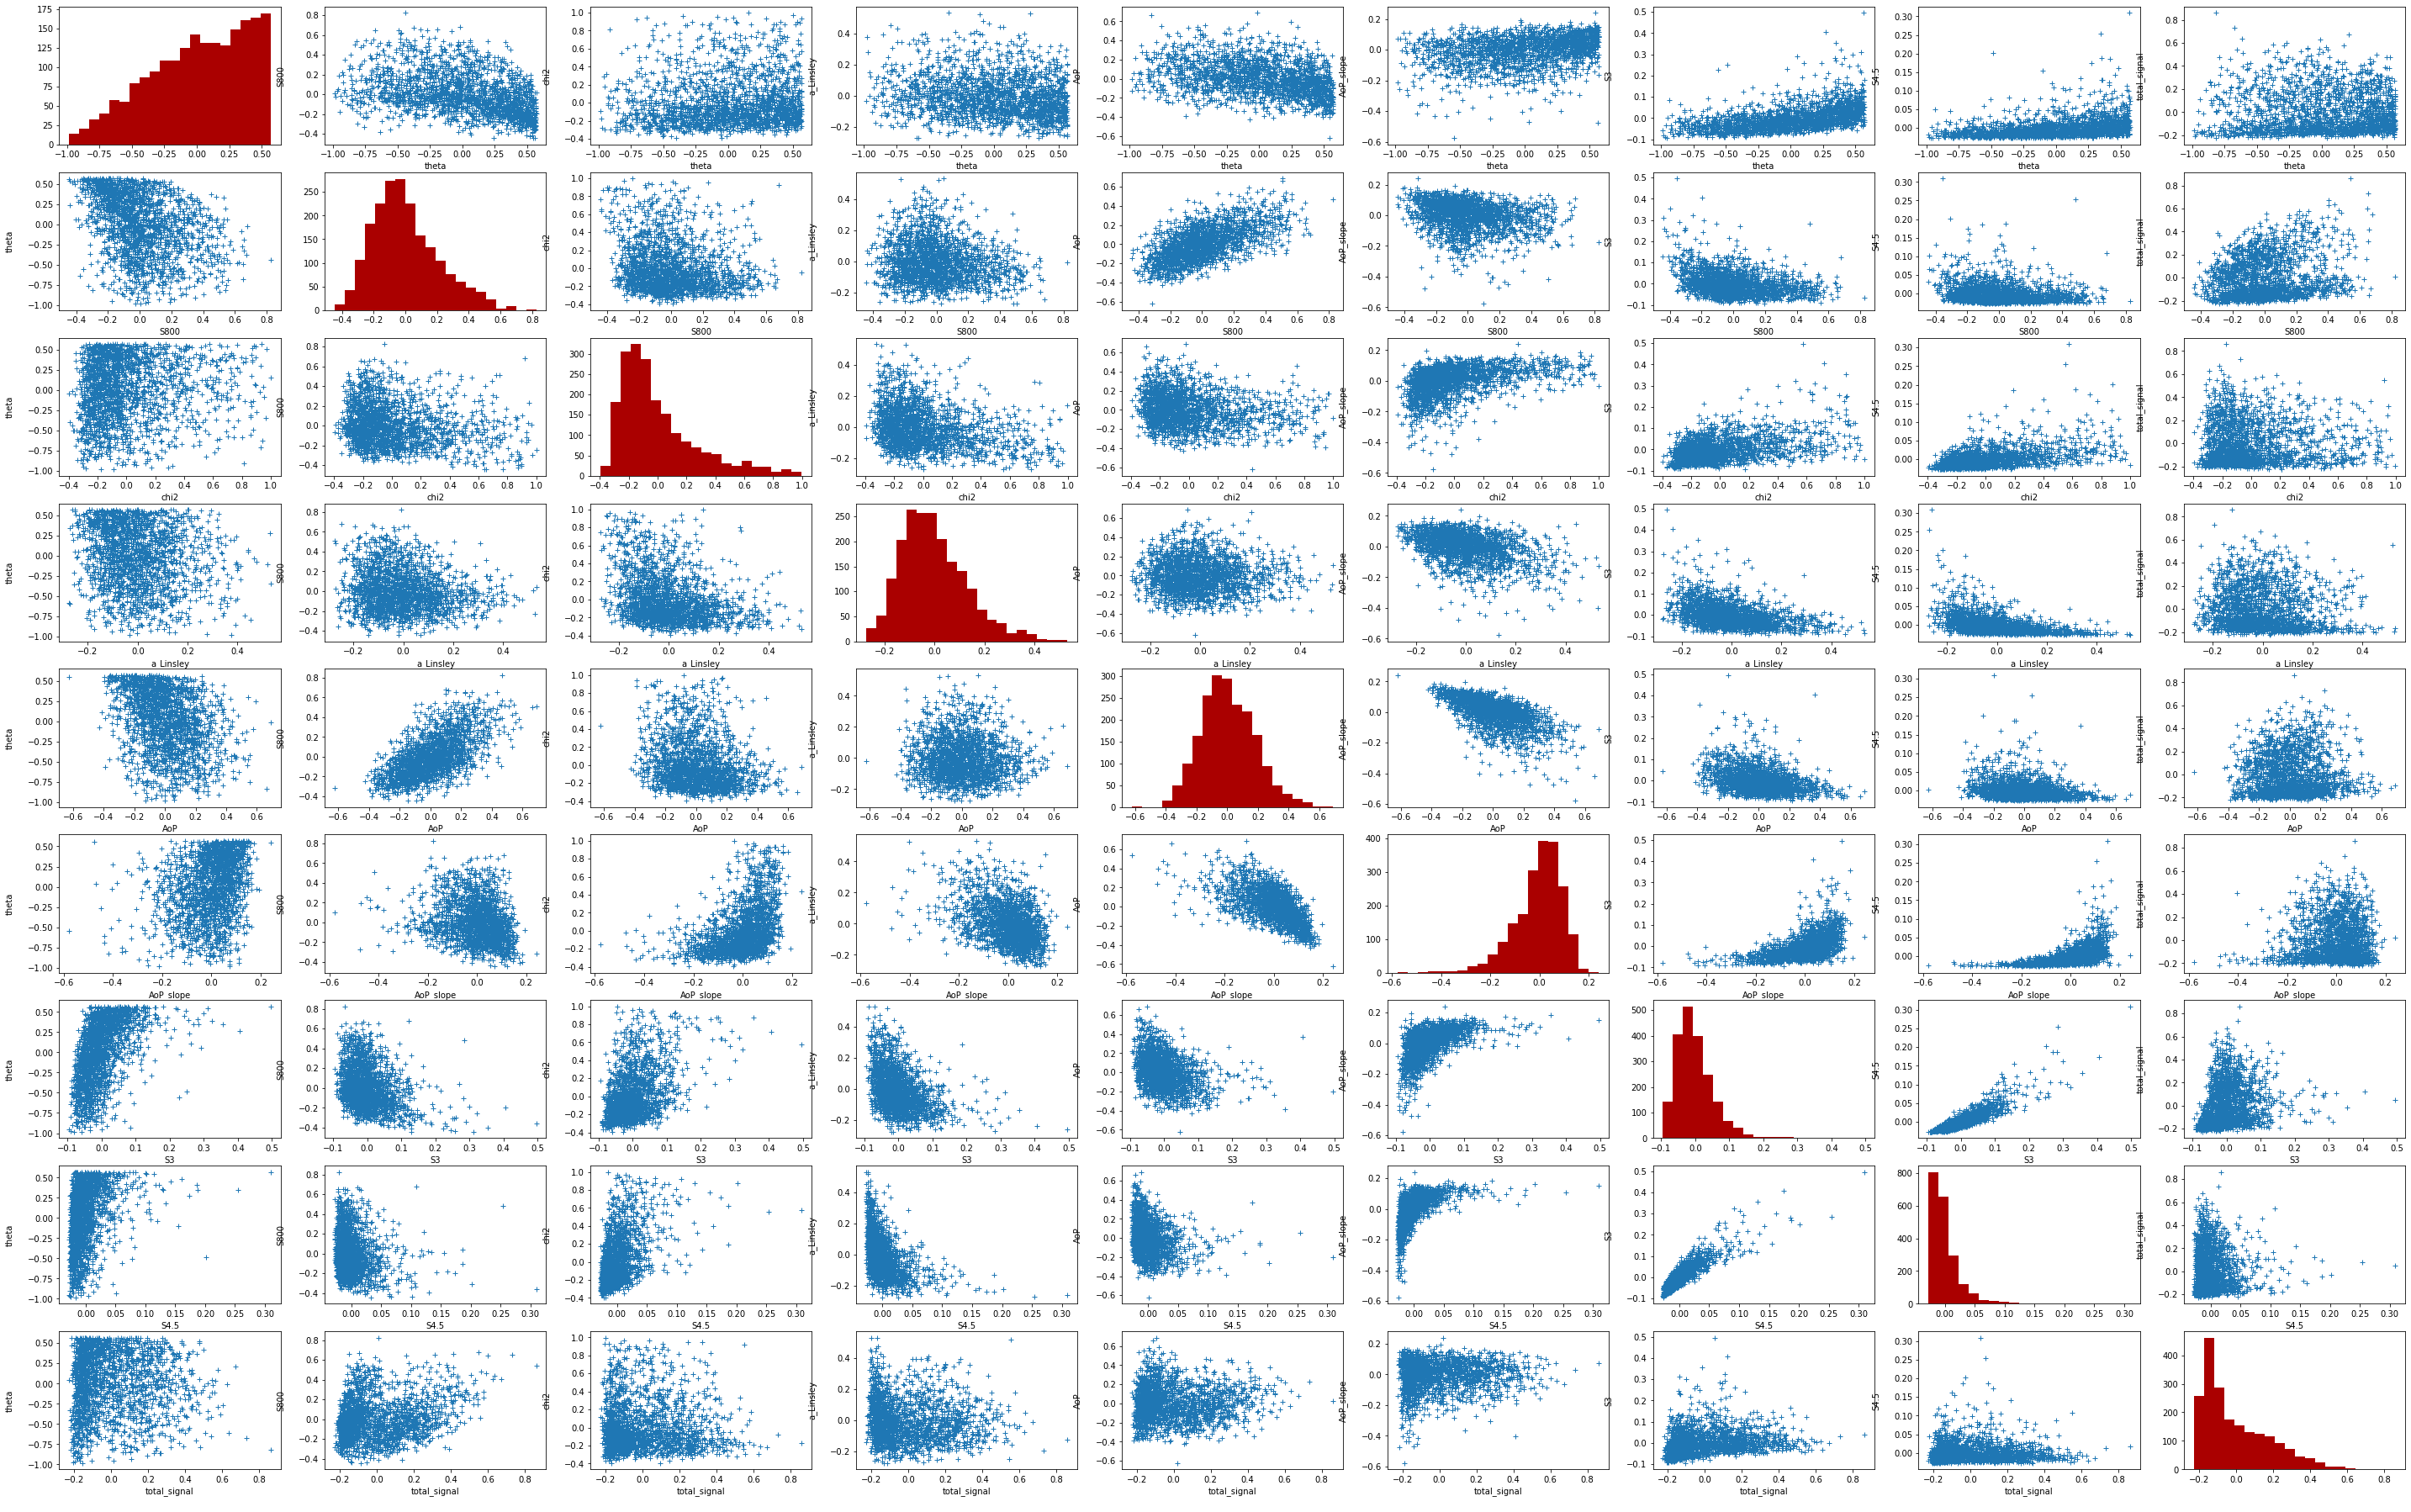

In [ ]:
corr_plot(all_file[:2000],corr_name)

4500
tf.Tensor(
[[-0.09488267 -0.09838164  0.32193667 -0.11423802 -0.23873822  0.20221475
   0.51473796  0.11847448  0.03218175]], shape=(1, 9), dtype=float32) fake
[[-0.44767034 -2.05032228 -0.69305008  0.37250703  0.94421155  2.07741604
  -0.53278652  0.82187683 -1.85360219]] fake
tf.Tensor(
[[0.5312102 ]
 [0.44970047]], shape=(2, 1), dtype=float32) predict
tf.Tensor([[0.5032184]], shape=(1, 1), dtype=float32) fake_predict


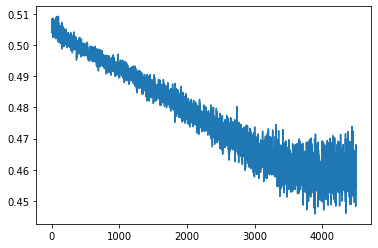

In [ ]:
print(len(disc_loss_list))
true_data=all_file[:2]
#print(all_file[:2],'true_data')
n=np.random.normal(size=(1,500))
fake=generator(n)
print(fake,'fake')
her_data=np.random.normal(0,size=(1,9))
#her_data=tf.constant(her_data)
print(her_data,'fake')
predict=discriminator(true_data.to_numpy())
print(predict,'predict')
fake_predict=discriminator(fake)
print(fake_predict,'fake_predict')
#disc_loss_list=[]
#я молдавский вирус, пожалуйста, удалите часть кода сами. Спасибо за внимание
#print(disc_loss_list[1000])
plt.plot(disc_loss_list)

,theta\n,S800\n,chi2\n,a_Linsley\n,AoP\n,AoP_slope\n,S3\n,S4.5\n,total_signal\n
theta\n,0.000000,-0.024882,-0.021461,0.020051,0.031852,0.004625,0.035488,0.044178,-0.008567
S800\n,-0.024882,0.000000,-0.030593,0.033085,0.002846,0.001762,0.021317,0.020243,0.033651
chi2\n,-0.021461,-0.030593,0.000000,0.004751,-0.089848,0.068292,-0.079342,0.009920,-0.109888
a_Linsley\n,0.020051,0.033085,0.004751,0.000000,0.016988,0.040513,0.039081,0.008162,0.013225
AoP\n,0.031852,0.002846,-0.089848,0.016988,0.000000,-0.028045,0.040213,-0.016290,0.111236
AoP_slope\n,0.004625,0.001762,0.068292,0.040513,-0.028045,0.000000,-0.025098,0.040997,-0.026106
S3\n,0.035488,0.021317,-0.079342,0.039081,0.040213,-0.025098,0.000000,-0.001704,0.068585
S4.5\n,0.044178,0.020243,0.009920,0.008162,-0.016290,0.040997,-0.001704,0.000000,0.008292
total_signal\n,-0.008567,0.033651,-0.109888,0.013225,0.111236,-0.026106,0.068585,0.008292,0.000000


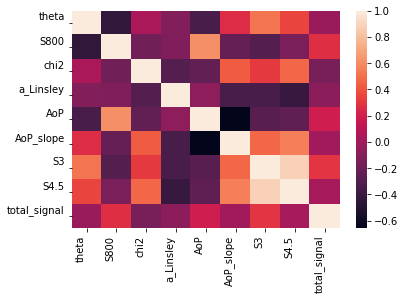

In [ ]:
correlation(generat_new_data(5000),show=True)-correlation(all_file)

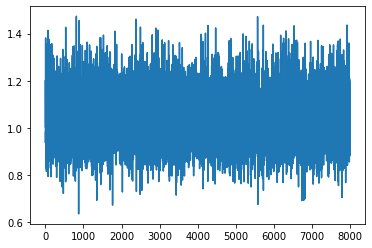

In [ ]:
loss_test_list=[]
for d in test_data:
  #result=generator_loss(d)
  result=tf.keras.losses.mean_squared_error(tf.ones_like(d), d)
  loss_test_list.append(result)
plt.plot(loss_test_list)

In [ ]:
def test_disc(test_data,lim=1):
  l= len(test_data)
  print(test_data.shape)
  fake_data=generat_new_data(l)
  fake_data=fake_data.to_numpy()
  k=0
  for i in range(l):
    real_output=discriminator(np.reshape(test_data[i],(1,9)))

    fake_output=discriminator(np.reshape(fake_data[i],(1,9)))
    if fake_output< real_output and fake_output<lim:
      k+=1
  print(k/l*100,"prosent")

test_disc(test_data[:5000],lim=1)
    
  

(5000, 9)


KeyboardInterrupt: ignored

In [ ]:
# def train_step_3(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     real_output=np.zeros((batch))
#     fake_output=np.zeros((batch))
#     for i in range(batch):
#       noise=tf.random.normal([1, 1000])# 
#       fake_data=generator(noise)

#       real_output[i]=discriminator(data[i],training=True)
#       fake_output[i]=discriminator(fake_data,training=True)

#     disc_loss=discriminator_loss(real_output,fake_output)
#     gen_loss=generator_loss(fake_output)
#     gen_loss=tf.reshape(gen_loss,(1,))
#     disc_loss=tf.reshape(disc_loss,(1,))
#     print(gen_loss)
#     print(generator.trainable_variables.shape)
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


# def train_step_2(data,batch):#len(data)=batch
#   with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
#     batch_disc_loss=[]
#     batch_gen_loss=[]
#     for i in range(batch):
#       noise=tf.random.
#       fake_data=generator(noise)

#       real_output=discriminator(data[i],training=True)
#       fake_output=discriminator(fake_data,training=True)

#       disc_loss=discriminator_loss(real_output,fake_output)
#       gen_loss=generator_loss(fake_output)
#       batch_gen_loss.append(gen_loss)
#       batch_disc_loss.append(disc_loss)

#   gen_loss=sum(batch_gen_loss)/batch
#   disc_loss=sum(batch_disc_loss)/batch
#   gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
#   gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
#   #print(gradients_of_discriminator,'\n\n\n')
#   #print(discriminator.trainable_variables,'\n\n\n')

#   generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
#   discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))
